## Understanding autoEAP workflow

The details of Extended Aperture Photometry are published here: https://ui.adsabs.harvard.edu/abs/2019ApJS..244...32P/abstract

A short summary of automatization is published here: https://ui.adsabs.harvard.edu/abs/2020arXiv200908786P/abstract

As an example, you can download a TPF from MAST.

In [1]:
from autoeap import createlightcurve

targetID = 'EPIC 251812081'
campaign = 18

To get through the steps, you have to set _show_plots_ to _True_. Or if you wish to save the plots into a directory, you can set _save_plots_ to _True_.

Local TPF not found, trying to download TPF instead
TPF found on MAST: K2 Campaign 18
Finding PSF centroids and removing outliers


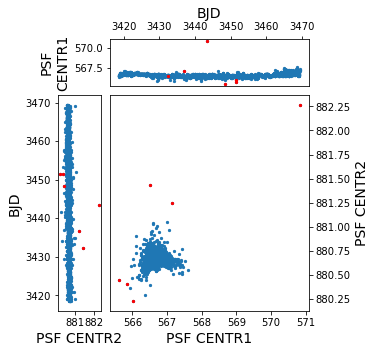

Optimizing apertures for each cadence


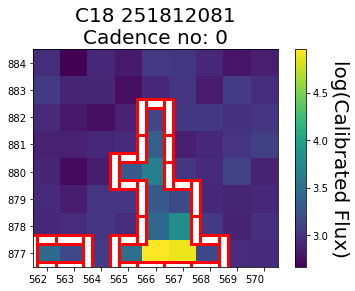

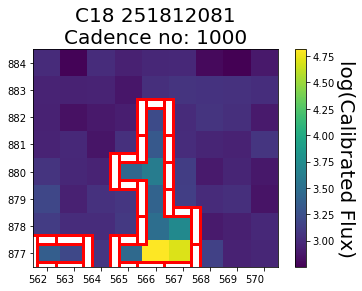

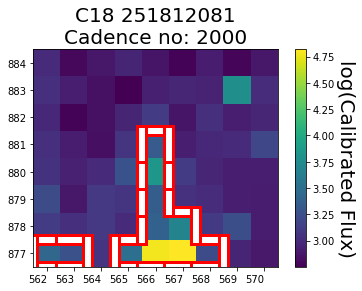

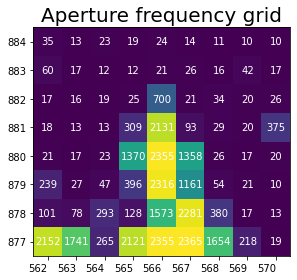

Starting iteration


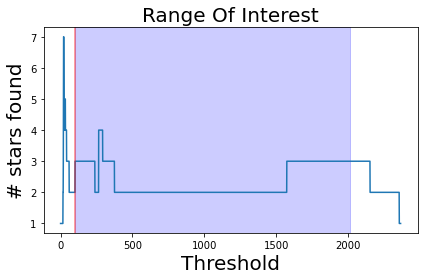

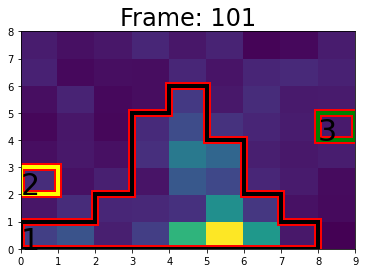

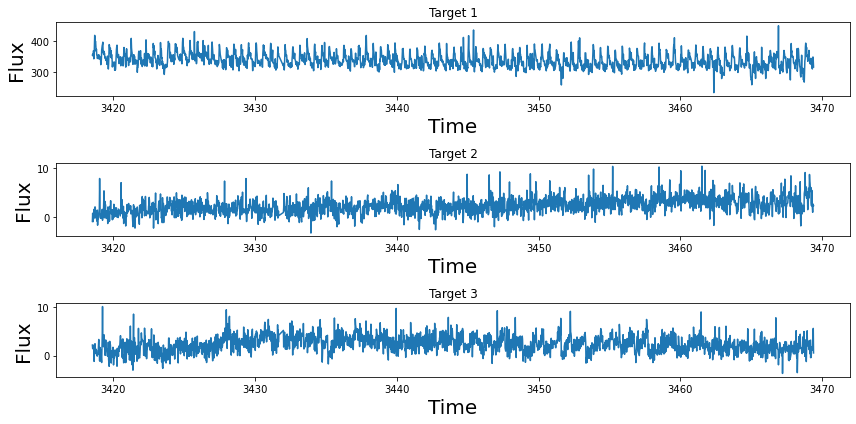

Iteration: 1


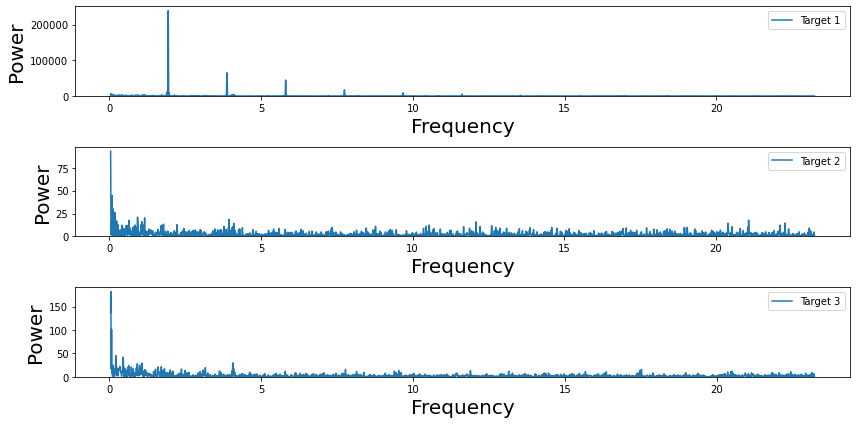

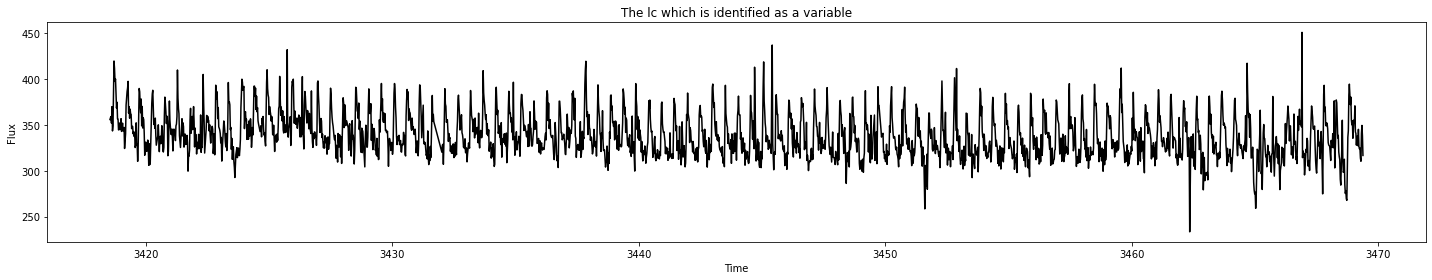

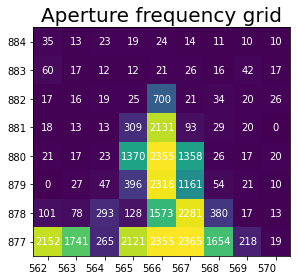

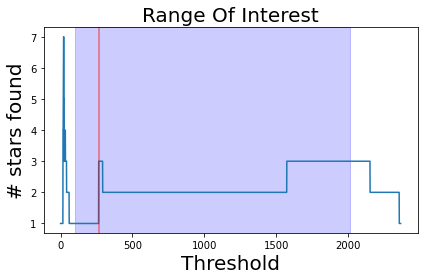

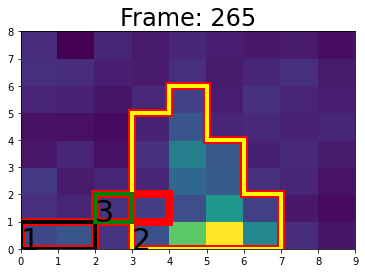

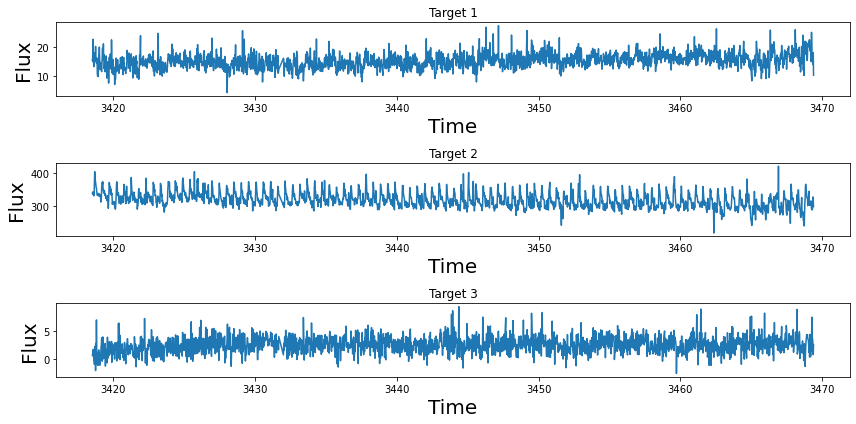

Iteration: 2


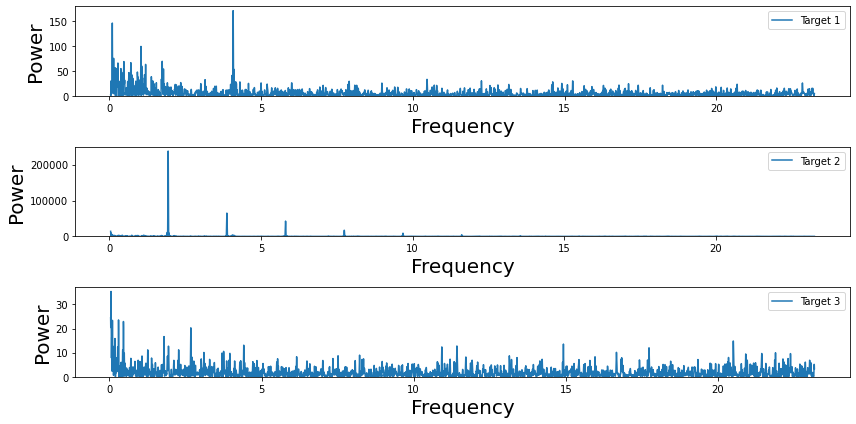

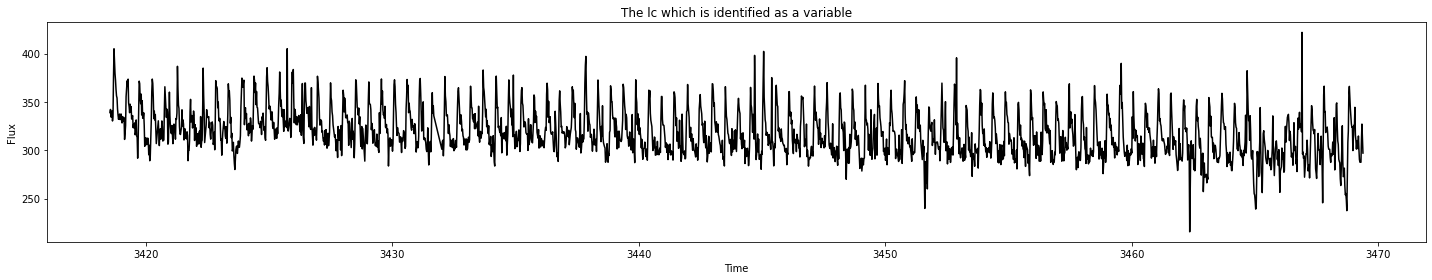

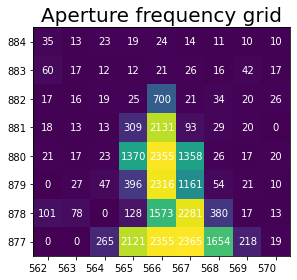

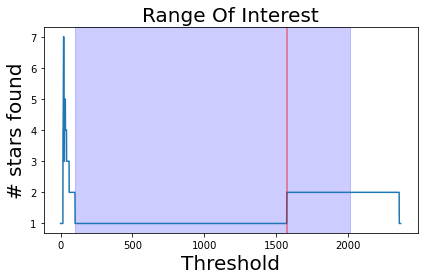

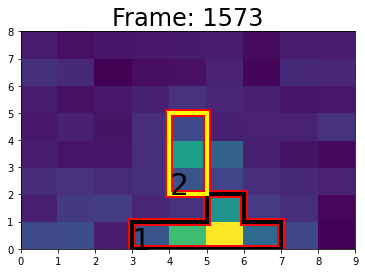

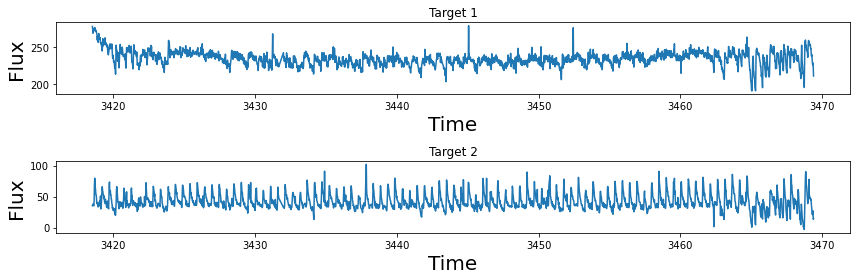

Iteration: 3


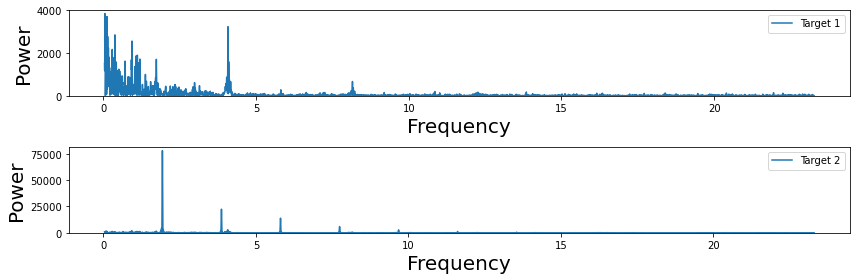

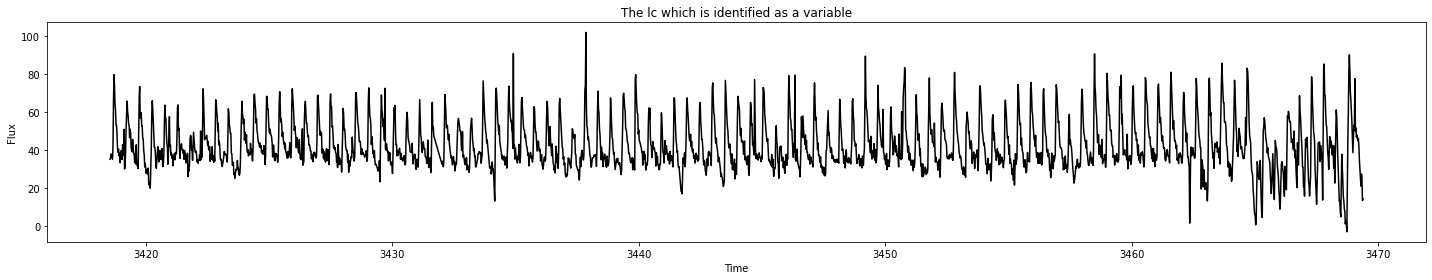

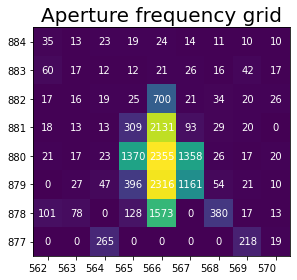

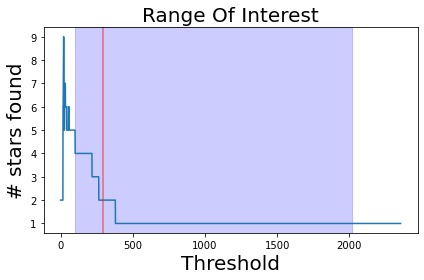

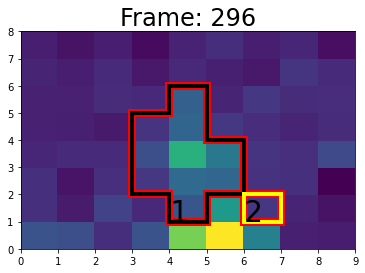

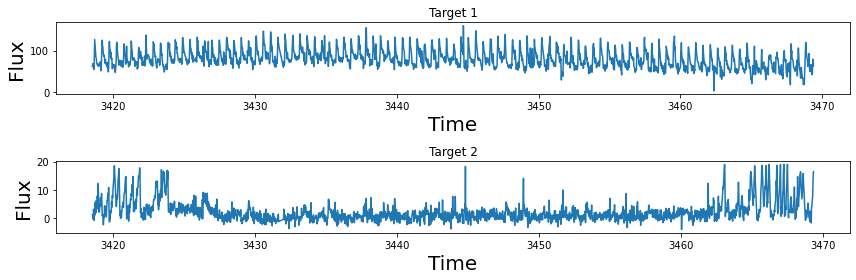

Iteration: 4


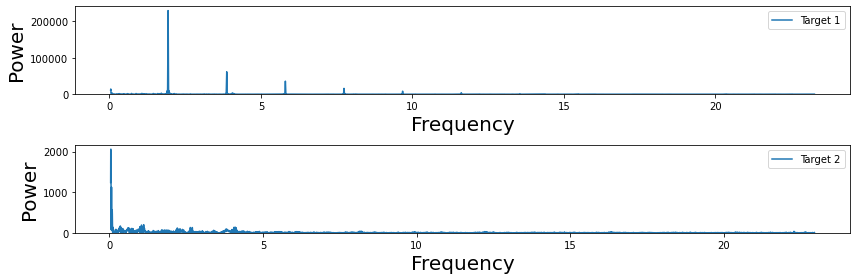

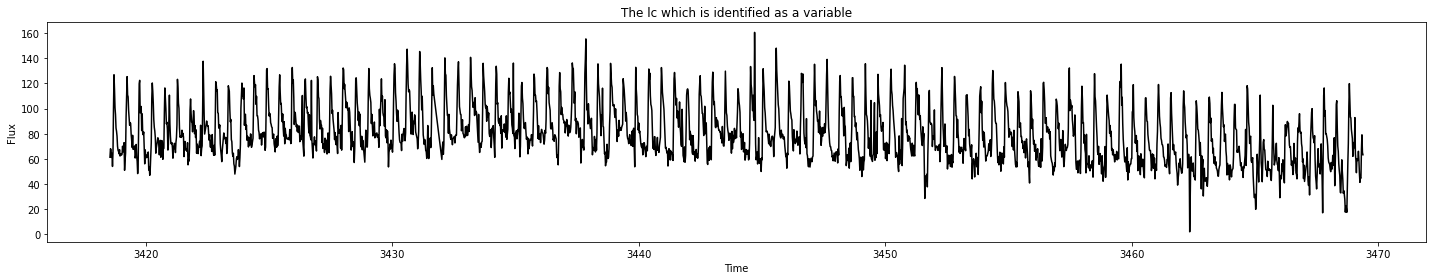

Iteration finished
Done


In [2]:
time,flux,flux_err = createlightcurve(
        targetID,              # Path to TPF or EPIC ID
        apply_K2SC=False,      # Apply K2 systematic correction
        remove_spline=False,   # Fit and remove low-order spline
        save_lc=False,         # Save final light curve to file
        campaign=campaign,     # K2 campaign number if TPF should be downladed
        TH=8,                  # Empirically determined tuning parameter
        show_plots=True,       # Vizualize steps inside notebook
        save_plots=True,       # Save plot files in a folder
        window_length=20       # The window length of the fitted spline in days.
        )

## The meaning of plots are as follows:

- The PSF photocenter movement. The upper and left hand side plots show the centroid movement in X and Y directions by time, respectively. The middle plots shows the CCD area visited by the centroid. The outlier points, marked by red, are indentified using Density-based spatial clustering of applications with noise (DBSCAN) algorithm. These points are excluded during the following steps.

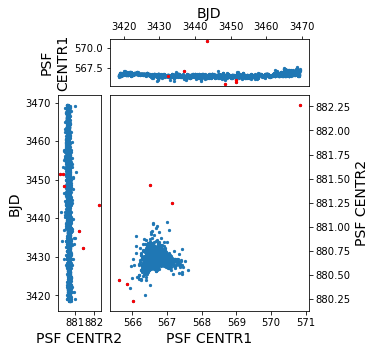

- Now, we loop over all cadences and separate the stars one-by-one. Here, you can see the separated sources in case of the first cadence (we are using zero-based indeces). We plot this for every 1000th candences to visualize the telescope movement. The target separation is done using astropy's photutils.

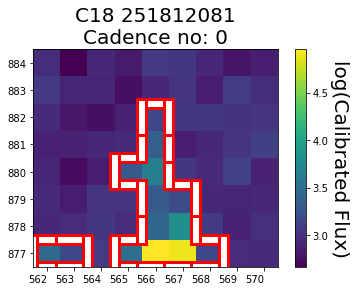

- After we know the location of targets for each candence, we can count how many times each pixel was selected. We dubbed this metric as aperture frequncy grid (AFG).

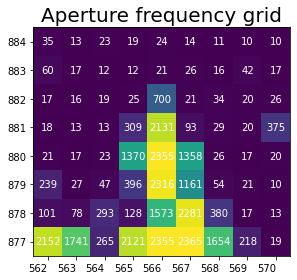

- In the AFG, we have to separate the distinct features that (probably) correspond to different stars. To do so, we set a threshold for the number of selection times (which is given for each pixel). Then, we only consider AFG values above this level and separate the features. The number of separated stars versus this threshold is plotted in the figure below. The limit runs from 0 to the maximum AFG value. We empirically tested and set an optimal range, between 100 and the 85th percentile of the maximum, which is used to find to the best separation. We have to balance the number of targets and the selected pixel area per target, not dividing the TPF into too many portions, and keeping the selected area per target as large as possibe to maximize the signal to noise ratio.

- The threshold is at where the first upward jump is detected, however, if there is none, we use the maximum AFG value divided by TH. The TH value is an empirically determined value, and is set to 8 by default.

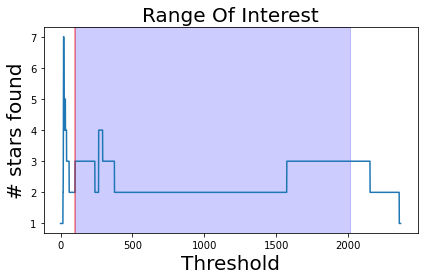

- And the separated features in a given frame.

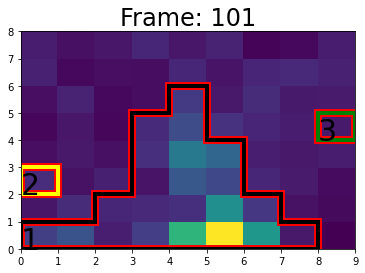

- As we do not know which one is the variable star, we have to perform an initial photometry for each of them.

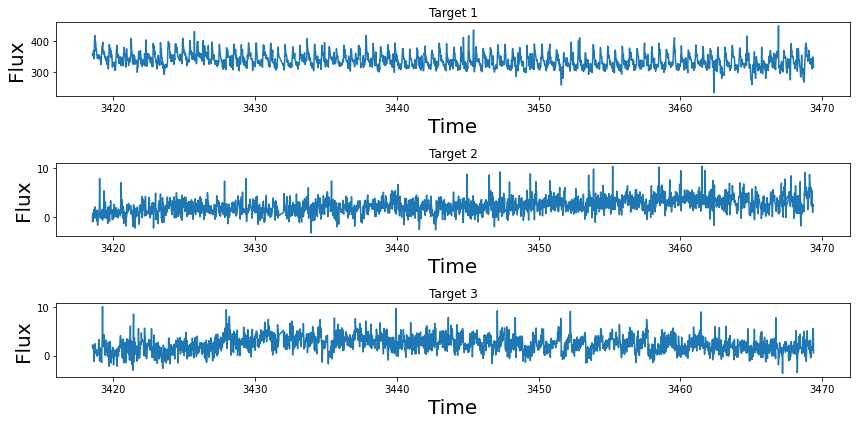

- We use Lomb-Scargle analysis to select the variable star, the one that has the largest amplitude variability.

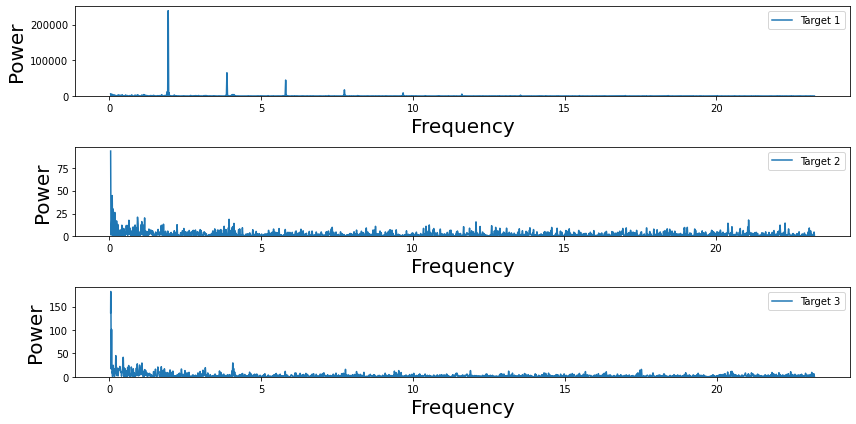

- And the proposed light curve.

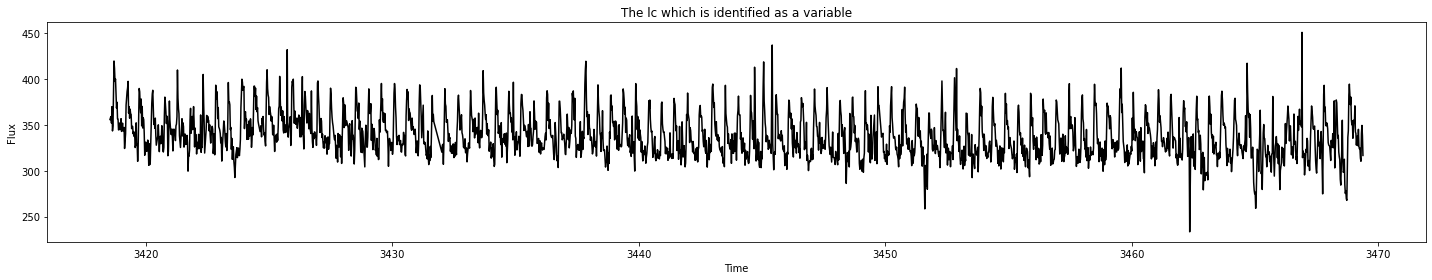

- After we know the location of AFG pixels that contains our variable star, we can eliminate the others. Just set those AFG values to 0.

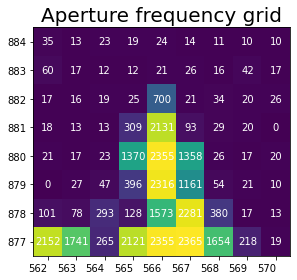

- And the search stars again, and continues after one only target remains...